In [1]:
import pandas as pd 
import numpy as np 


In [2]:
from sklearn.datasets import make_classification


In [3]:
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
x

array([[ 1.41134182,  0.94309672],
       [ 0.28391651,  1.38116421],
       [ 0.45964603, -0.601085  ],
       ...,
       [-2.2468878 , -2.73699021],
       [ 1.19133584,  1.13088856],
       [-1.21051909, -1.07640041]])

In [5]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [6]:
pd.DataFrame(x)[0]

0      1.411342
1      0.283917
2      0.459646
3      1.041743
4      1.253202
         ...   
995    2.043974
996    1.507037
997   -2.246888
998    1.191336
999   -1.210519
Name: 0, Length: 1000, dtype: float64

In [7]:
pd.DataFrame(x)[1]

0      0.943097
1      1.381164
2     -0.601085
3      1.389155
4      1.366832
         ...   
995    1.126935
996   -2.333424
997   -2.736990
998    1.130889
999   -1.076400
Name: 1, Length: 1000, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='0', ylabel='1'>

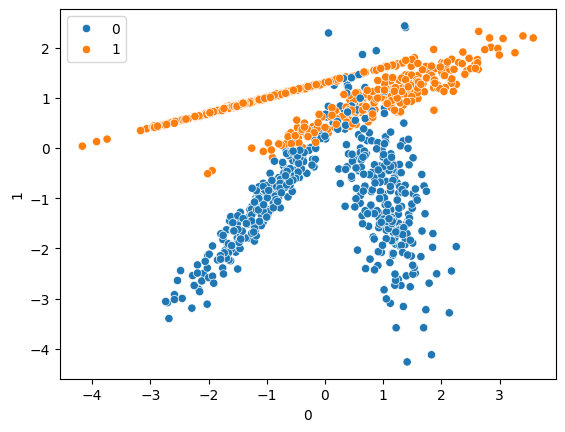

In [9]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVC


In [14]:
svc=SVC(kernel='linear')

In [16]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
svc.coef_

array([[-0.73479243,  2.46710866]])

In [18]:
y_pred_1=svc.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))

0.932
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       117
           1       1.00      0.87      0.93       133

    accuracy                           0.93       250
   macro avg       0.94      0.94      0.93       250
weighted avg       0.94      0.93      0.93       250



In [20]:
from sklearn.model_selection import GridSearchCV

para={'C':[0,0.1,10,100,1000],
      'gamma':[1,0.1,0.01,0.001,0.0001],
      'kernel':['linear']
}

In [21]:
grid=GridSearchCV(SVC(),param_grid=para,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ......C=0, gamma=0.01, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ......C=0, gamma=0.01, kernel=line

/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_p

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [25]:
y_pred=grid.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.94
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       121
           1       0.99      0.89      0.94       129

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

